In [75]:
import sys
sys.path.append('../')
%matplotlib inline
import python.edge as edge 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.segmentation import active_contour

In the following code I will be using thresholding and morphlogical operations to obtain the seeding points of Active Contours alogrithm

In [76]:
#reading and filtering the image
file= '../data/interim/spim2/c357.jpg'
img = cv2.imread(file,0)
app1 = cv2.imread(file)
filtered = cv2.bilateralFilter(img, 12,350,350)
#finding the edge
edgeShape = edge.edge(filtered)


In [77]:
k, thres = cv2.threshold(edgeShape, 2, 255, cv2.THRESH_BINARY)
#plt.imshow(cv2.cvtColor(thres, cv2.COLOR_GRAY2RGB))

In [78]:
closing = cv2.morphologyEx(thres, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7)),iterations=1)
#plt.imshow(cv2.cvtColor(closing, cv2.COLOR_GRAY2RGB))

In [79]:
opening = cv2.morphologyEx(closing, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)),iterations=1)
#plt.imshow(cv2.cvtColor(opening, cv2.COLOR_GRAY2RGB))

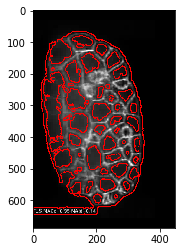

In [80]:
_ , contours, _ = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(app1, contours, -1, (250, 0, 0),2)
plt.imshow(app1)

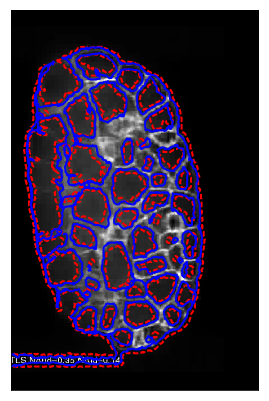

In [81]:
INTIALS =[] # stores the seed points
FINALS = [] # stores the coordinate of contours that we get from ActiveContours
for cnts in  contours:
    init = []
    for cnt in cnts:
        init.append([cnt[0][0],cnt[0][1]])
    init=np.array(init)
    INTIALS.append(init)
    
    #TODO: Experiment with different kind of parameters. 
    snake = active_contour(filtered,init, w_edge=1000, w_line=0, convergence=10, beta=5.1, max_iterations=10000)
    FINALS.append(snake)
    
#plotting the results
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.gray()
ax.imshow(img)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
for x in range(len(FINALS)):
    ax.plot(INTIALS[x][:, 0], INTIALS[x][:, 1], '--r', lw=2)
    ax.plot(FINALS[x][:, 0], FINALS[x][:, 1], '-b', lw=2)